# **Solution to TD1**

**We will only solve Problems 6, 7, 8, 9, 10, and 11 here, as the others (4 and 5) require the simplex method, while Problems 1, 2, and 3 focus on formulation.**

## Problem 6 — Solve Problem 1

---

**Maximize**

$$Z = 40x_A + 90x_B$$


**Subject to**

\begin{aligned}
x_A - 4x_B &\ge 0\\
x_A &\le 110\\
x_A + 2x_B &\le 150\\
x_A,\;x_B &\ge 0
\end{aligned}


---


### **Solution from ```scipy.optimize.linprog```**

*Note that the function only supports minimization, so you will need to minimize the negative of the objective function.*


In [8]:
from scipy.optimize import linprog

# Maximize Z = 40*xA + 90*xB -> linprog minimizes, so use -Z
c = [-40, -90]

# Constraints
# xA- 4xB >= 0 -> -xA + 4xB <= 0
# 1*xA + 2*xB <= 300
# xA <= 110
A = [[-1, 4],
     [1, 2],
     [1, 0]]
b = [0, 150, 110]

# Bounds xA, xB >=0
x0_bounds = (0, None)
x1_bounds = (0, None)

res1 = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])   

print("Problem 1 Optimal solution:")
print("xA =", res1.x[0])
print("xB =", res1.x[1])
print("Maximum Z =", -res1.fun)

Problem 1 Optimal solution:
xA = 100.0
xB = 25.0
Maximum Z = 6250.0


### **Plotting**

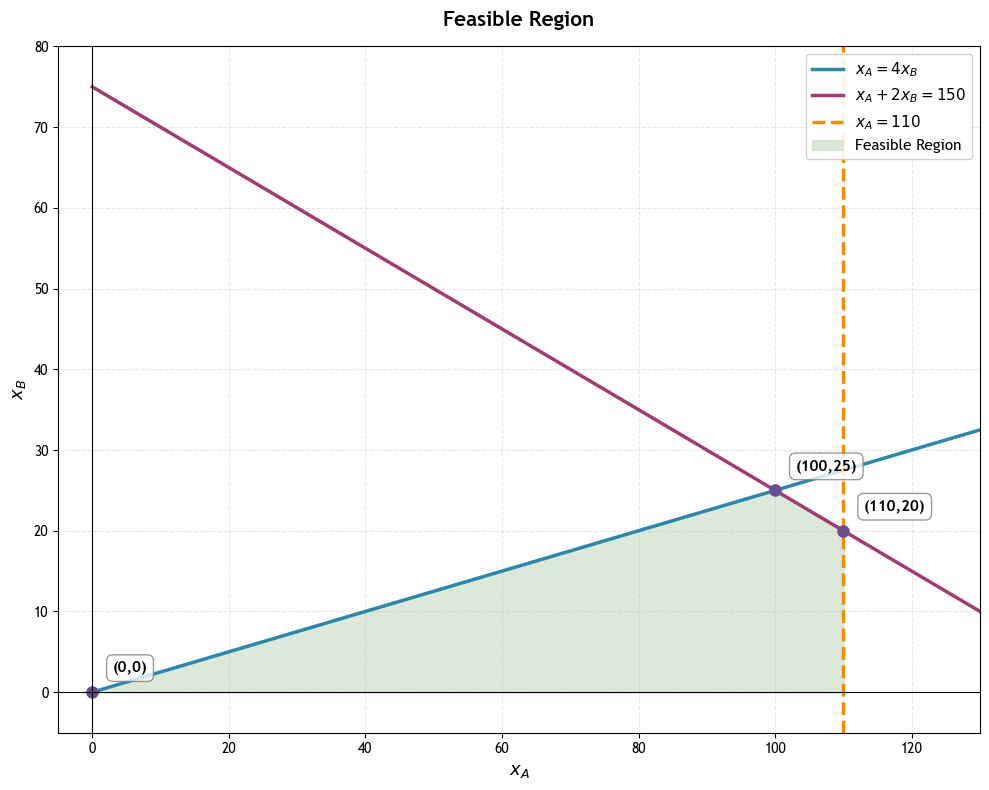

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Trebuchet MS'

# ---------------- Problem 1 ----------------
x_A = np.linspace(0, 150, 400)
x_B1 = x_A / 4
x_B2 = (150 - x_A) / 2
plt.figure(figsize=(10, 8))
plt.plot(x_A, x_B1, label=r'$x_A = 4x_B$', color='#2E86AB', linewidth=2.5)
plt.plot(x_A, x_B2, label=r'$x_A + 2x_B = 150$', color='#A23B72', linewidth=2.5)
plt.axvline(x=110, color='#F18F01', linestyle='--', linewidth=2.5, label=r'$x_A = 110$')
x_fill = np.linspace(0, 110, 400)
y_upper = np.minimum(x_fill / 4, (150 - x_fill)/2)
plt.fill_between(x_fill, 0, y_upper, color='#C6DABF', alpha=0.6, label='Feasible Region')
points = np.array([[0,0],[100,25],[110,20]])
plt.plot(points[:,0], points[:,1], 'o', color='#6A4C93', markersize=8)
for x,y in points:
    plt.text(x+3, y+2.5, f'({x},{y})', fontsize=11, fontweight='bold', bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='gray', alpha=0.8))
plt.xlim(-5,130)
plt.ylim(-5,80)
plt.xlabel(r'$x_A$', fontsize=13, fontweight='bold')
plt.ylabel(r'$x_B$', fontsize=13, fontweight='bold')
plt.title('Feasible Region', fontsize=15, fontweight='bold', pad=15)
plt.legend(fontsize=11, loc='upper right', framealpha=0.9)
plt.grid(True, linestyle='--', alpha=0.3)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()


## Problem 7 — Solve Problem 2

---

**Maximize** 

$$Z = 0.05x_A + 0.08x_B$$


**Subject to**
$$
\begin{align*}
x_A + x_B &= 5000 \\
x_A &\ge 1250 \\
x_B &\le 2500 \\
2x_A - x_B &\ge 0 \\
x_A, x_B &\ge 0
\end{align*}
$$

---


### **Solution from ```scipy.optimize.linprog```**

In [10]:
# Maximize Z = 0.05*xA + 0.08*xB -> linprog minimizes -> -Z
c = [-0.05, -0.08]

# Constraints
# xA + xB = 5000 -> split into two inequalities for linprog
# xA >= 1250 -> -xA <= -1250
# xB <= 2500 -> xB <= 2500
# xA >= 0.5*xB -> -xA + 0.5*xB <= 0

A_ub = [
    [1, 1],    # xA + xB <= 5000
    [-1, -1],  # -xA - xB <= -5000 -> xA + xB >= 5000
    [-1, 0],   # -xA <= -1250 -> xA >= 1250
    [0, 1],    # xB <= 2500
    [-1, 0.5]  # -xA + 0.5*xB <= 0 -> xA >= 0.5*xB
]
b_ub = [5000, -5000, -1250, 2500, 0]

bounds = [(0, None), (0, None)]

res2 = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)
print("\nProblem 2 Optimal solution:")
print("xA =", res2.x[0])
print("xB =", res2.x[1])
print("Maximum Z =", -res2.fun)


Problem 2 Optimal solution:
xA = 2500.0
xB = 2500.0
Maximum Z = 325.0


### **Plotting**

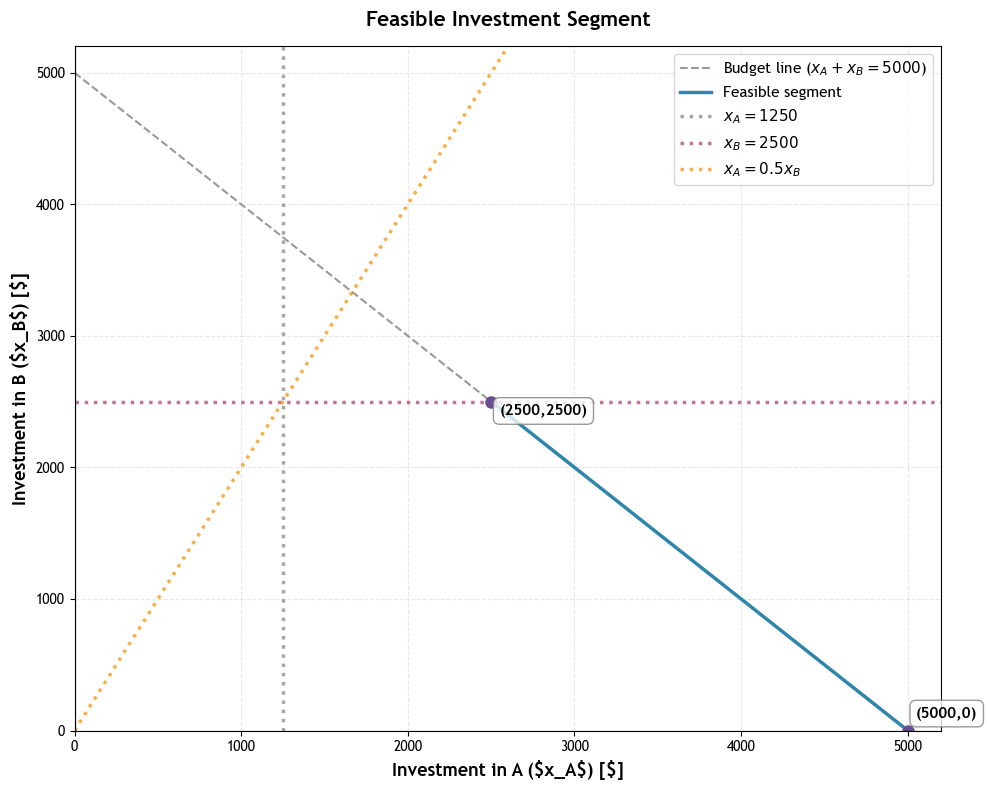

In [11]:
# ---------------- Problem 2 ----------------
total = 5000
x_A = np.linspace(0, total, 500)
x_B = total - x_A
x_A_feasible = np.linspace(2500, 5000, 200)
x_B_feasible = total - x_A_feasible
point1 = (2500, 2500)
point2 = (5000, 0)
plt.figure(figsize=(10, 8))
plt.plot(x_A, x_B, '--', color='#999999', linewidth=1.5, label='Budget line ($x_A + x_B = 5000$)')
plt.plot(x_A_feasible, x_B_feasible, color='#2E86AB', linewidth=2.5, label='Feasible segment')
plt.axvline(1250, color='gray', linestyle=':', linewidth=2.5, alpha=0.7, label='$x_A = 1250$')
plt.axhline(2500, color='#A23B72', linestyle=':', linewidth=2.5, alpha=0.7, label='$x_B = 2500$')
plt.plot(x_A, 2*x_A, color='#F18F01', linestyle=':', linewidth=2.5, alpha=0.7, label='$x_A = 0.5 x_B$')
plt.plot(*point1, 'o', color='#6A4C93', markersize=8)
plt.plot(*point2, 'o', color='#6A4C93', markersize=8)
for x,y in [point1, point2]:
    plt.text(x+50, y-100 if y>0 else y+100, f'({x},{y})', fontsize=11, fontweight='bold', bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='gray', alpha=0.8))
plt.xlim(0,5200)
plt.ylim(0,5200)
plt.xlabel(r'Investment in A ($x_A$) [$]', fontsize=13, fontweight='bold')
plt.ylabel(r'Investment in B ($x_B$) [$]', fontsize=13, fontweight='bold')
plt.title('Feasible Investment Segment', fontsize=15, fontweight='bold', pad=15)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.3)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

## Problem 8 — Solve Problem 3

---

**Maximize** 

$$Z =  x_R + 25x_T$$


**Subject to**
$$
\begin{align*}
15x_R + 300x_T &\leq 10000 \\
x_R &\ge 2x_T \\
x_R &\le 400 \\
x_R, x_T &\ge 0
\end{align*}
$$

---

### **Solution from ```scipy.optimize.linprog```**

In [12]:
# Maximize Z = xR + 25*xT -> linprog minimizes -> -Z
c = [-1, -25]

# Constraints in the form A_ub * x <= b_ub
# 1) Budget: xR + 20*xT <= 666.67
# 2) Radio at least twice TV: -xR + 2*xT <= 0  -> xR - 2xT >= 0
# 3) Max radio time: xR <= 400

A_ub = [
    [1, 20],
    [-1, 2],
    [1, 0]
]
b_ub = [666.67, 0, 400]

# Bounds xR, xT >= 0
bounds = [(0, None), (0, None)]

res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)
print("Optimal advertising plan:")
print("xR (radio minutes) =", res.x[0])
print("xT (TV minutes) =", res.x[1])
print("Maximum effectiveness Z =", -res.fun)


Optimal advertising plan:
xR (radio minutes) = 60.60636363636363
xT (TV minutes) = 30.303181818181816
Maximum effectiveness Z = 818.185909090909


### **Plotting**

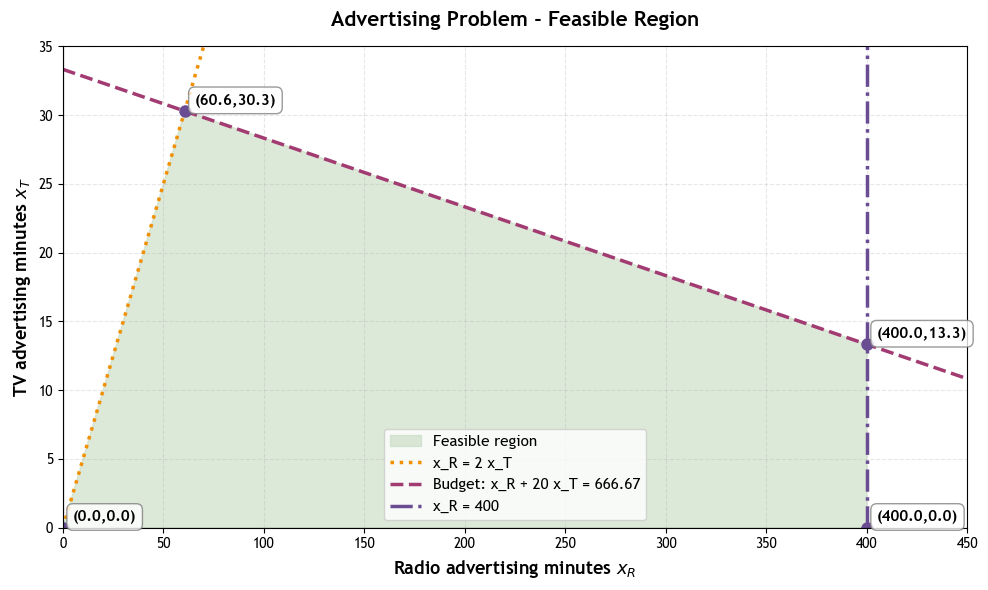

In [13]:
# ---------------- Problem 3 ----------------
x_R = np.linspace(0, 450, 500)
x_T_budget = (666.67 - x_R)/20
vertices = np.array([[60.6,30.3],[400,13.33],[400,0],[0,0]])
plt.figure(figsize=(10,6))
plt.fill(vertices[:,0], vertices[:,1], color='#C6DABF', alpha=0.6, label='Feasible region')
plt.plot(2*x_R, x_R, color='#F18F01', linestyle=':', linewidth=2.5, label='x_R = 2 x_T')
plt.plot(x_R, x_T_budget, color='#A23B72', linestyle='--', linewidth=2.5, label='Budget: x_R + 20 x_T = 666.67')
plt.axvline(400, color='#6A4C93', linestyle='-.', linewidth=2.5, label='x_R = 400')
plt.plot(vertices[:,0], vertices[:,1], 'o', color='#6A4C93', markersize=8)
for x,y in vertices:
    plt.text(x+5, y+0.5, f'({x:.1f},{y:.1f})', fontsize=11, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='gray', alpha=0.8))
plt.xlim(0,450)
plt.ylim(0,35)
plt.xlabel('Radio advertising minutes $x_R$', fontsize=13, fontweight='bold')
plt.ylabel('TV advertising minutes $x_T$', fontsize=13, fontweight='bold')
plt.title('Advertising Problem - Feasible Region', fontsize=15, fontweight='bold', pad=15)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(fontsize=11)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()

plt.show()

## Problem 9 — Solve Problem 9

---

**Minimize** 

$$Z = x_B + x_H$$


**Subject to**
$$
\begin{align*}
0.10x_B + 0.25x_H &\geq 10000\\
x_H &\leq 0.6(x_B + x_H) \\
x_B, x_H &\geq 0\\
\end{align*}
$$

---

### **Solution from ```scipy.optimize.linprog```**

In [15]:
from scipy.optimize import linprog

# Minimize Z = xB + xH
c = [1, 1]

# Constraints A_ub * x <= b_ub
A_ub = [
    [-2, -5],  # 2xB + 5xH >= 200000 -> -2xB -5xH <= -200000
    [-3, 2]    # 3xB - 2xH >= 0 -> -3xB + 2xH <= 0
]
b_ub = [-200000, 0]

# Bounds xB, xH >= 0
bounds = [(0, None), (0, None)]

res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)
print("Optimal investment:")
print("xB (blue chips $) =", res.x[0])
print("xH (high tech $) =", res.x[1])
print("Minimum total investment Z =", res.fun)


Optimal investment:
xB (blue chips $) = 21052.63157894737
xH (high tech $) = 31578.94736842105
Minimum total investment Z = 52631.57894736842


### **Plotting**

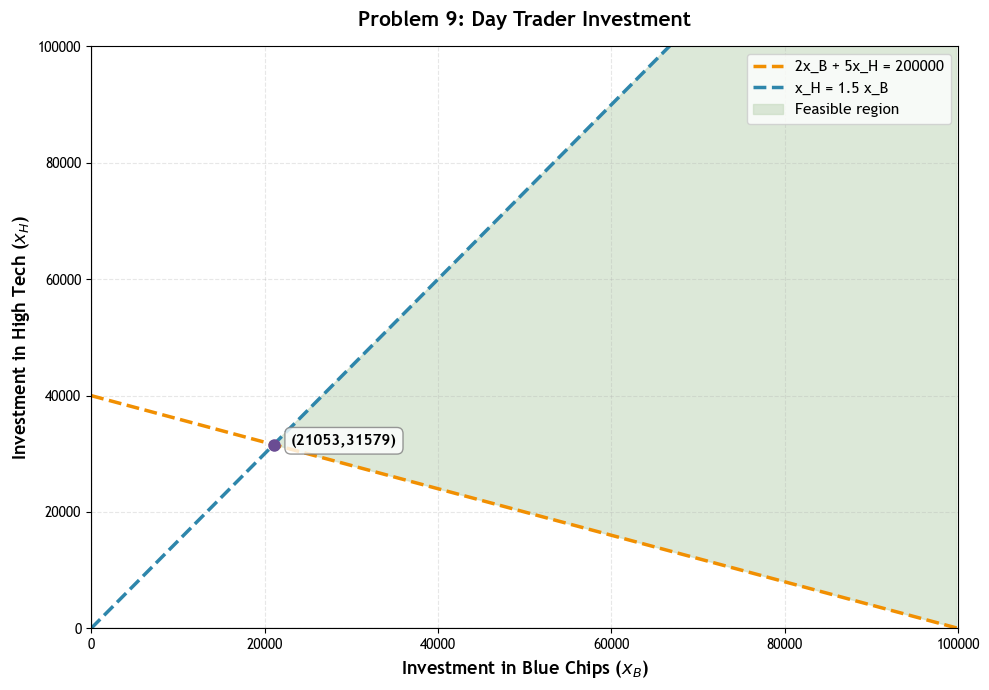

In [16]:
# ---------------- Problem 9 ----------------
x_B = np.linspace(0, 120000, 500)
x_H_yield = (200000 - 2*x_B)/5
x_H_limit = 1.5 * x_B
mask = (x_H_yield <= x_H_limit) & (x_H_yield >= 0)
x_B_feasible = x_B[mask]
x_H_feasible_lower = x_H_yield[mask]
x_H_feasible_upper = x_H_limit[mask]
x_B_opt = 200000 / (2 + 5*1.5)
x_H_opt = 1.5 * x_B_opt
plt.figure(figsize=(10,7))
plt.plot(x_B, x_H_yield, color='#F18F01', linestyle='--', linewidth=2.5, label='2x_B + 5x_H = 200000')
plt.plot(x_B, x_H_limit, color='#2E86AB', linestyle='--', linewidth=2.5, label='x_H = 1.5 x_B')
plt.fill_between(x_B_feasible, x_H_feasible_lower, x_H_feasible_upper, color='#C6DABF', alpha=0.6, label='Feasible region')
plt.plot(x_B_opt, x_H_opt, 'o', color='#6A4C93', markersize=8)
plt.text(x_B_opt+2000, x_H_opt, f'({x_B_opt:.0f},{x_H_opt:.0f})', fontsize=11, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='gray', alpha=0.8))
plt.xlim(0,100000)
plt.ylim(0,100000)
plt.xlabel('Investment in Blue Chips ($x_B$)', fontsize=13, fontweight='bold')
plt.ylabel('Investment in High Tech ($x_H$)', fontsize=13, fontweight='bold')
plt.title('Problem 9: Day Trader Investment', fontsize=15, fontweight='bold', pad=15)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(fontsize=11)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

## Problem 10 — Solve Problem 10

---

**Maximize** 

$$Z = 2000x_R + 3000x_T$$


**Subject to**
$$
\begin{align*}
300x_R + 2000x_T &\leq 20000 \\
300x_R &\leq 16000 \\
2000x_T &\leq 16000 \\
x_R, x_T &\geq 1 
\end{align*}
$$

---

### **Solution from ```scipy.optimize.linprog```**

In [17]:
from scipy.optimize import linprog

# Maximize Z = 2000*xR + 3000*xT -> linprog minimizes -> -Z
c = [-2000, -3000]

# Constraints in the form A_ub * x <= b_ub
# 1) Budget: 300*xR + 2000*xT <= 20000
# 2) Radio max: 300*xR <= 16000
# 3) TV max: 2000*xT <= 16000

A_ub = [
    [300, 2000],
    [300, 0],
    [0, 2000]
]
b_ub = [20000, 16000, 16000]

# Bounds xR, xT >= 1
bounds = [(1, None), (1, None)]

res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)
print("Optimal advertising plan:")
print("xR (radio ads) =", res.x[0])
print("xT (TV ads) =", res.x[1])
print("Maximum reach Z =", -res.fun)


Optimal advertising plan:
xR (radio ads) = 53.333333333333336
xT (TV ads) = 2.0
Maximum reach Z = 112666.66666666667


### **Plotting**

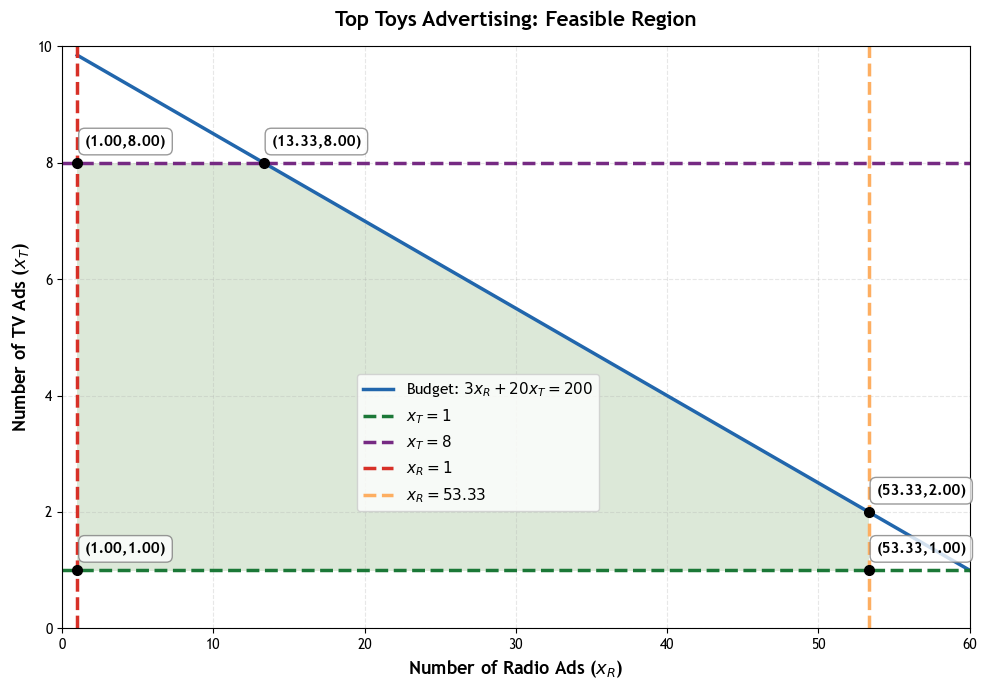

In [18]:
# ---------------- Problem 10 ----------------
x_R = np.linspace(1, 60, 400)
x_T_budget = (200 - 3*x_R)/20
x_R_min, x_R_max = 1, 53.33
x_T_min, x_T_max = 1, 8
plt.figure(figsize=(10,7))
X_R, X_T = np.meshgrid(np.linspace(x_R_min, x_R_max, 300), np.linspace(x_T_min, x_T_max+1, 300))
feasible = (3*X_R + 20*X_T <= 200) & (X_R>=x_R_min) & (X_R<=x_R_max) & (X_T>=x_T_min) & (X_T<=x_T_max)
plt.contourf(X_R, X_T, feasible, levels=[0.5,1], colors=['#C6DABF'], alpha=0.6)
plt.plot(x_R, x_T_budget, color='#2166ac', linestyle='-', linewidth=2.5, label=r'Budget: $3x_R + 20x_T = 200$')
plt.axhline(y=x_T_min, color='#1b7837', linestyle='--', linewidth=2.5, label=r'$x_T = 1$')
plt.axhline(y=x_T_max, color='#762a83', linestyle='--', linewidth=2.5, label=r'$x_T = 8$')
plt.axvline(x=x_R_min, color='#d73027', linestyle='--', linewidth=2.5, label=r'$x_R = 1$')
plt.axvline(x=x_R_max, color='#fdae61', linestyle='--', linewidth=2.5, label=r'$x_R = 53.33$')
points = np.array([[1,1],[53.33,1],[53.33,2],[13.33,8],[1,8]])
plt.plot(points[:,0], points[:,1], 'ko', markersize=7)
for x,y in points:
    plt.text(x+0.5, y+0.3, f'({x:.2f},{y:.2f})', fontsize=11, fontweight='bold', bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='gray', alpha=0.8))
plt.xlim(0,60)
plt.ylim(0,10)
plt.xlabel('Number of Radio Ads ($x_R$)', fontsize=13, fontweight='bold')
plt.ylabel('Number of TV Ads ($x_T$)', fontsize=13, fontweight='bold')
plt.title('Top Toys Advertising: Feasible Region', fontsize=15, fontweight='bold', pad=15)
plt.legend(fontsize=11, bbox_to_anchor=(0.6,0.45))
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Problem 11 — Solve Problem 11

---

**Maximize** 

$$Z = 50x_C + 100x_D$$


**Subject to**
$$
\begin{align*}
x_C + 2.5x_D &\leq 200 \\
x_C &\leq 120  \\
x_D &\leq 60 \\
11x_C + 15x_D &\leq 1650 \\
x_C, x_D &\geq 0
\end{align*}
$$

---

### **Solution from ```scipy.optimize.linprog```**

In [19]:
from scipy.optimize import linprog

# Maximize Z = 50*xC + 100*xD -> linprog minimizes -> -Z
c = [-50, -100]

# Constraints in the form A_ub * x <= b_ub
# 1) Sawing: xC/200 + xD/80 <= 1 -> 0.005*xC + 0.0125*xD <= 1
# 2) Chair assembly: xC <= 120 -> 1*xC + 0*xD <= 120
# 3) Desk assembly: xD <= 60 -> 0*xC + 1*xD <= 60
# 4) Painting: xC/150 + xD/110 <= 1 -> 0.0066667*xC + 0.0090909*xD <= 1

A_ub = [
    [1/200, 1/80],
    [1, 0],
    [0, 1],
    [1/150, 1/110]
]
b_ub = [1, 120, 60, 1]

# Bounds xC, xD >= 0
bounds = [(0, None), (0, None)]

res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)
print("Optimal production plan:")
print("xC (chairs) =", res.x[0])
print("xD (desks) =", res.x[1])
print("Maximum profit Z =", -res.fun)


Optimal production plan:
xC (chairs) = 90.0
xD (desks) = 44.0
Maximum profit Z = 8900.0


### **Plotting**

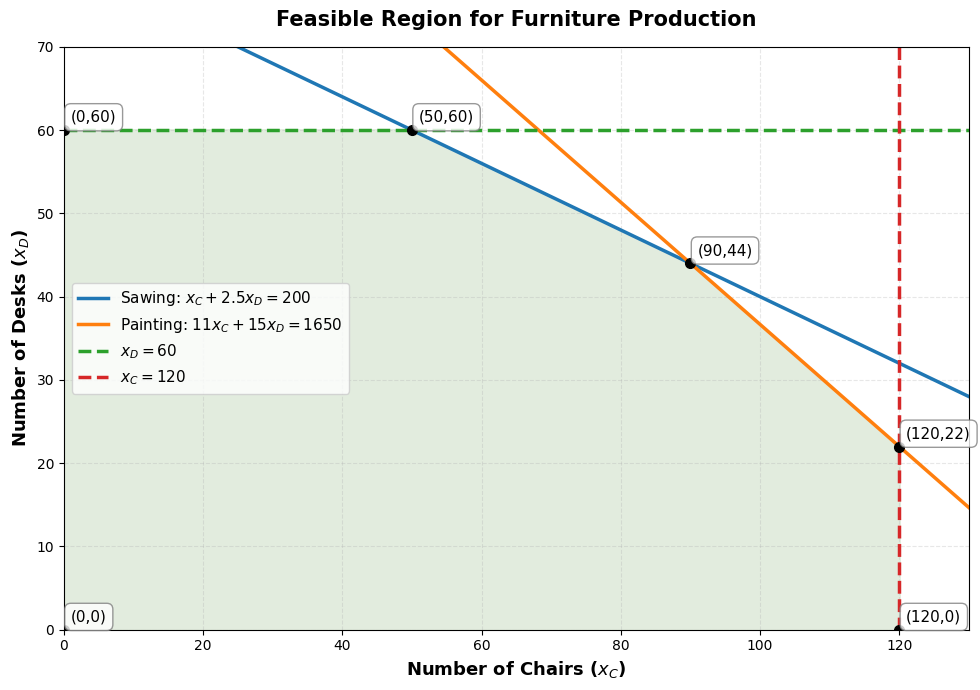

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_C = np.linspace(0, 130, 400)
x_D_sawing = (200 - x_C)/2.5
x_D_painting = (1650 - 11*x_C)/15
x_C_grid = np.linspace(0,130,300)
x_D_grid = np.linspace(0,70,300)
X_C, X_D = np.meshgrid(x_C_grid, x_D_grid)
feasible = (X_C + 2.5*X_D <= 200) & (X_D<=60) & (X_C<=120) & (11*X_C + 15*X_D <=1650) & (X_C>=0) & (X_D>=0)

A = np.array([[1,2.5],[11,15]])
b = np.array([200,1650])
x_int = np.linalg.solve(A,b)
x_C_int, x_D_int = x_int

x_D_paint_at_120 = (1650 - 11*120)/15

plt.figure(figsize=(10,7))
plt.contourf(X_C, X_D, feasible, levels=[0.5,1], colors=['#C6DABF'], alpha=0.5)
plt.plot(x_C, x_D_sawing, color='#1f77b4', linewidth=2.5, label=r'Sawing: $x_C + 2.5x_D = 200$')
plt.plot(x_C, x_D_painting, color='#ff7f0e', linewidth=2.5, label=r'Painting: $11x_C + 15x_D = 1650$')
plt.axhline(60, color='#2ca02c', linestyle='--', linewidth=2.5, label=r'$x_D = 60$')
plt.axvline(120, color='#d62728', linestyle='--', linewidth=2.5, label=r'$x_C = 120$')

points = np.array([
    [0,0],
    [0,60],
    [50,60],
    [x_C_int, x_D_int],
    [120, x_D_paint_at_120],
    [120,0]
])

plt.plot(points[:,0], points[:,1], 'ko', markersize=7)
for x,y in points:
    plt.text(x+1, y+1, f'({x:.0f},{y:.0f})', fontsize=11,  bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='gray', alpha=0.8))

plt.xlabel(r'Number of Chairs ($x_C$)', fontsize=13, fontweight='bold')
plt.ylabel(r'Number of Desks ($x_D$)', fontsize=13, fontweight='bold')
plt.title('Feasible Region for Furniture Production', fontsize=15, fontweight='bold', pad=15)
plt.xlim(0,130)
plt.ylim(0,70)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()
